## 1. Write a code for generating a power law network using a configuration model. Also, your code should have the parameter gamma as one of its inputs.
  > a. Use the code to generate 4 power law networks of size 500 nodes and gamma= 1, 1.5, 2 and 3
  
  > b. Plot the degree distribution of the above generated power-law network



Generating network for gamma = 1


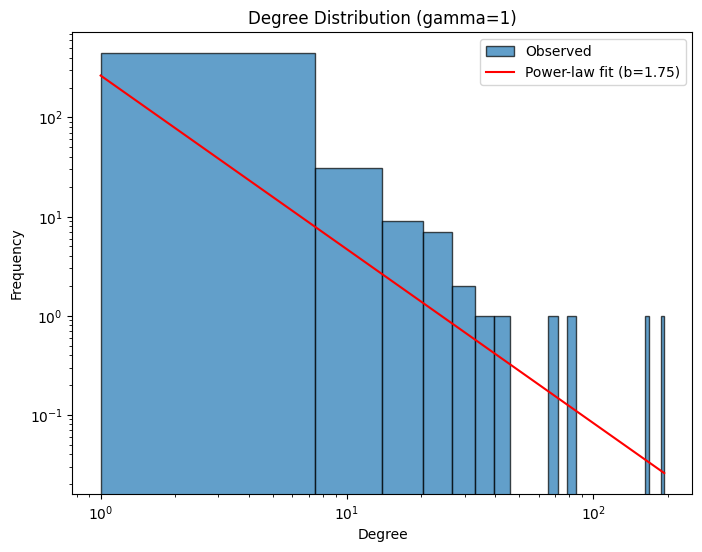

Generating network for gamma = 1.5


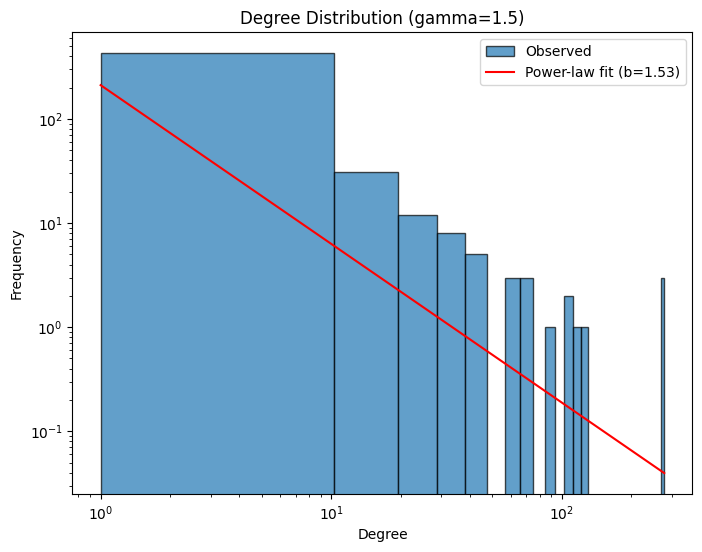

Generating network for gamma = 2


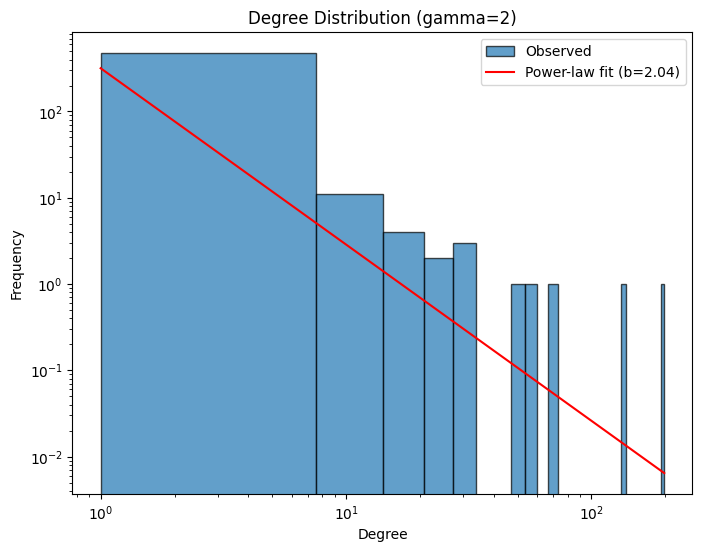

Generating network for gamma = 3


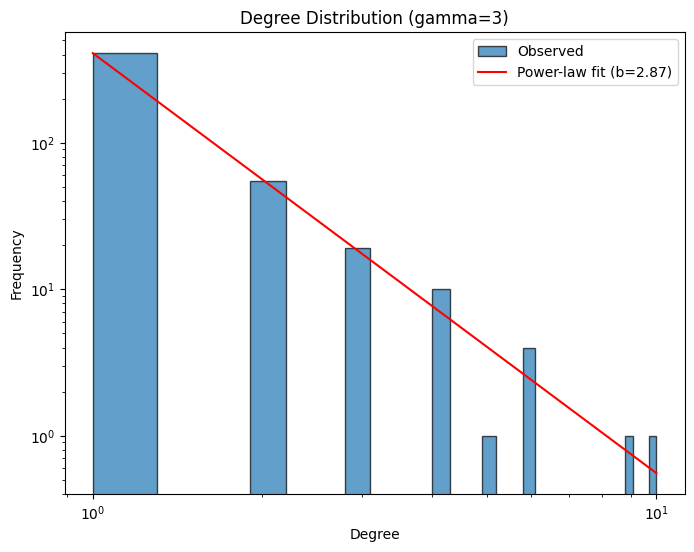

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings("ignore")

def generate_power_law_network(n, gamma):
    """
    Generates a power-law network using the configuration model.

    Parameters:
        n (int): Number of nodes
        gamma (float): Power-law exponent

    Returns:
        G (networkx.Graph): Generated network
    """
    if gamma == 1:
        # Use Pareto distribution as a workaround for gamma=1
        degree_seq = (np.random.pareto(a=1, size=n) + 1).astype(int)
    else:
        # Generate a degree sequence following a power-law distribution
        degree_seq = np.random.zipf(gamma, size=n)

    # Ensure the sum of degrees is even
    if sum(degree_seq) % 2 == 1:
        degree_seq[np.argmax(degree_seq)] += 1

    # Create the configuration model graph
    G = nx.configuration_model(degree_seq)

    # Convert to simple graph (remove parallel edges and self-loops)
    G = nx.Graph(G)
    G.remove_edges_from(nx.selfloop_edges(G))

    return G

def power_law(x, a, b):
    """Power-law function for curve fitting."""
    return a * (x ** -b)

# Example usage
if __name__ == "__main__":
    num_nodes = 500  # Number of nodes
    gamma_value = [1, 1.5, 2, 3]  # Power-law exponents including gamma=1

    for i in gamma_value:
        print(f"Generating network for gamma = {i}")
        power_law_graph = generate_power_law_network(num_nodes, i)

        # Compute degree distribution
        degrees = np.array([d for n, d in power_law_graph.degree()])
        unique_degrees, counts = np.unique(degrees, return_counts=True)

        # Fit power-law curve
        popt, _ = curve_fit(power_law, unique_degrees, counts, maxfev=100)

        # Plot degree distribution
        plt.figure(figsize=(8, 6))
        plt.hist(degrees, bins=30, edgecolor="black", alpha=0.7, label="Observed")

        # Overlay fitted power-law curve
        x_vals = np.linspace(min(unique_degrees), max(unique_degrees), 100)
        plt.plot(x_vals, power_law(x_vals, *popt), 'r-', label=f'Power-law fit (b={popt[1]:.2f})')

        plt.xlabel("Degree")
        plt.ylabel("Frequency")
        plt.title(f"Degree Distribution (gamma={i})")
        plt.yscale("log")
        plt.xscale("log")
        plt.legend()
        plt.show()
